<a href="https://colab.research.google.com/github/AmrGhanem195/MachineLearningModel/blob/main/supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
***The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.***

#Attribute information
1. **Invoice id**: Computer generated sales slip invoice identification number.


2.  **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

3. **City**: Location of supercenters.

4. **Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. **Gender**: Gender type of customer.

6. **Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

7. **Unit price:** Price of each product in $.

8. **Quantity:** Number of products purchased by customer.

9. **Tax:** 5% tax fee for customer buying.

10. **Total:** Total price including tax.

11. **Date:** Date of purchase (Record available from January 2019 to March 2019).

12. **Time:** Purchase time (10am to 9pm).

13. **Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

14. **COGS:** Cost of goods sold.

15. **Gross margin percentage**: Gross margin percentage.

16. **Gross income:** Gross income.

17. **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).



#Import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # To show all the columns

#Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/supermarket_sales - Sheet1.csv')

#GENERAL INFORMATION FROM THE DATA


In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [ ]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
print ('This Data is from between', data['Date'].min() , 'To', data['Date'].max())

This Data is from between 1/1/2019 To 3/9/2019


In [ ]:
data['Branch'].unique()


array(['A', 'C', 'B'], dtype=object)

In [ ]:
print ('This Supermarket has 3 stores' , data['Branch'].unique())

This Supermarket has 3 stores ['A' 'C' 'B']


In [ ]:
print('We have' , data['Customer type'].nunique() ,'Different Customer Type , That is :',  data['Customer type'].unique())


We have 2 Different Customer Type , That is : ['Member' 'Normal']


In [ ]:
print('We have',data['Product line'].nunique(),'Different Product Line Type , That is :',data['Product line'].unique())


We have 6 Different Product Line Type , That is : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [ ]:
print('We have',data['Payment'].nunique(),'Different Payment Type , That is :',data['Payment'].unique())


We have 3 Different Payment Type , That is : ['Ewallet' 'Cash' 'Credit card']



# Exploratory Data Analysis

##COUNTPLOT

A countplot is kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.

In [ ]:
data.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
675,242-11-3142,B,Mandalay,Member,Male,Fashion accessories,83.77,2,8.377,175.917,2/24/2019,19:57,Cash,167.54,4.761905,8.377,4.6


In [ ]:
def plot_col(col):
    print('values of column are',col,'\n',data[col].value_counts())
    plt.figure(figsize=(12,6))
    sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")
    plt.title(f'{col.title()}')
    plt.show()

values of column are Branch 
 A    340
B    332
C    328
Name: Branch, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


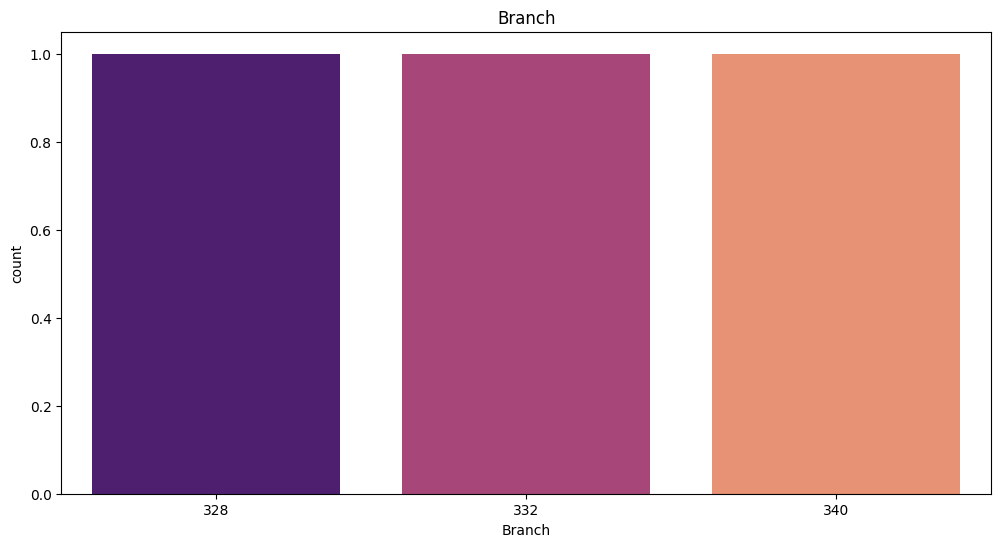

In [ ]:
plot_col('Branch')


In [ ]:
data.City.value_counts() #each city has one branch : From Example city: Yangon has Branch A and so.

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

values of column are Payment 
 Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


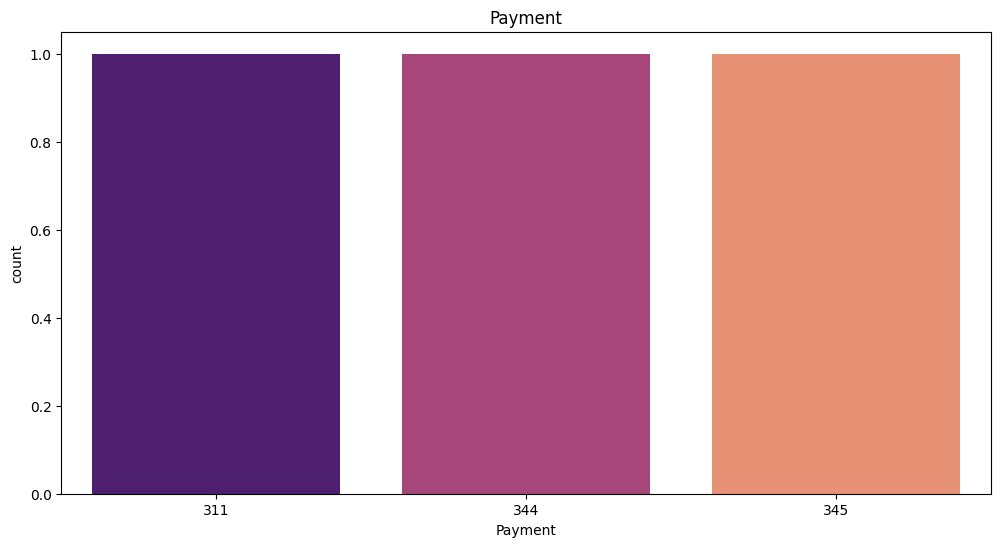

In [ ]:
plot_col('Payment')


values of column are Quantity 
 10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


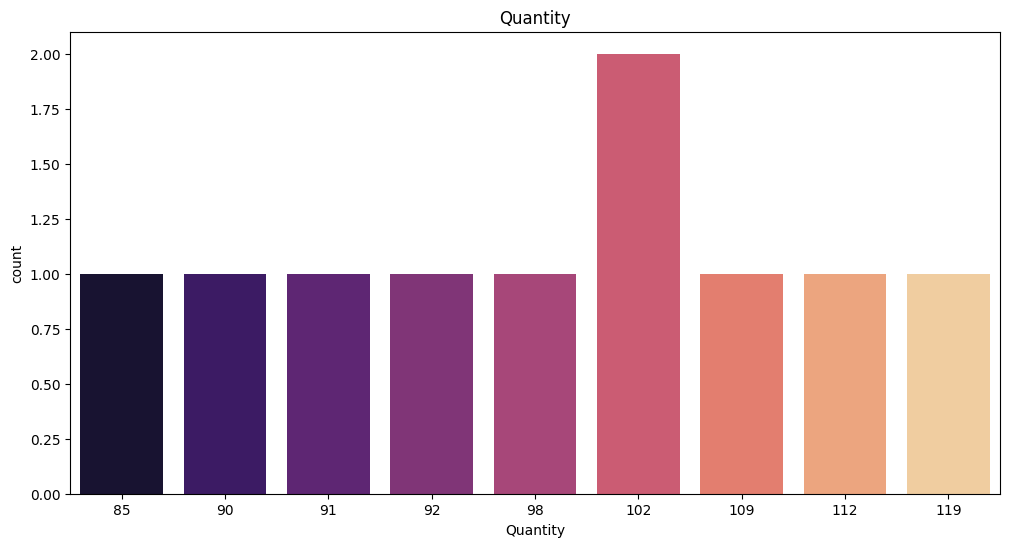

In [ ]:
plot_col('Quantity')


values of column are Customer type 
 Member    501
Normal    499
Name: Customer type, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


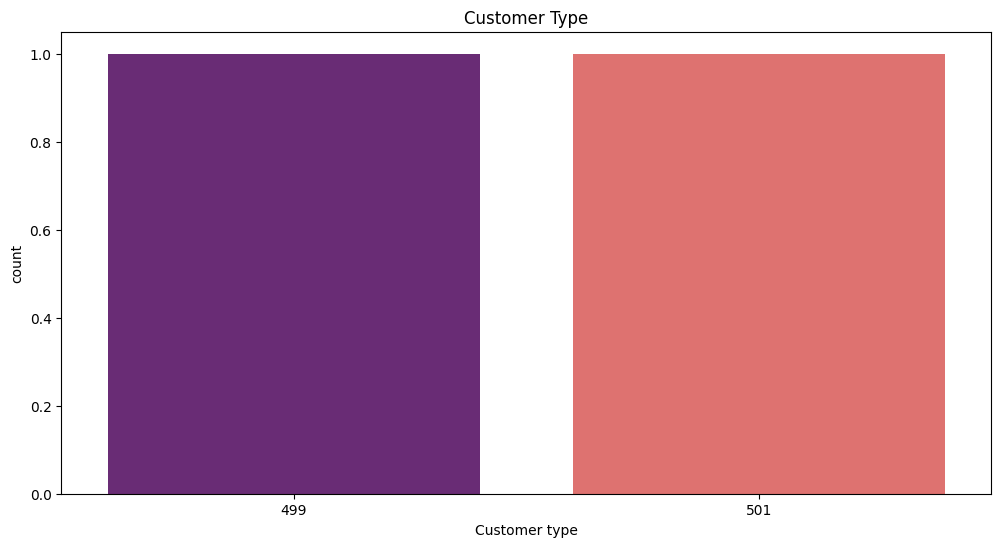

In [ ]:
plot_col('Customer type')


In [ ]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

values of column are Product line 
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


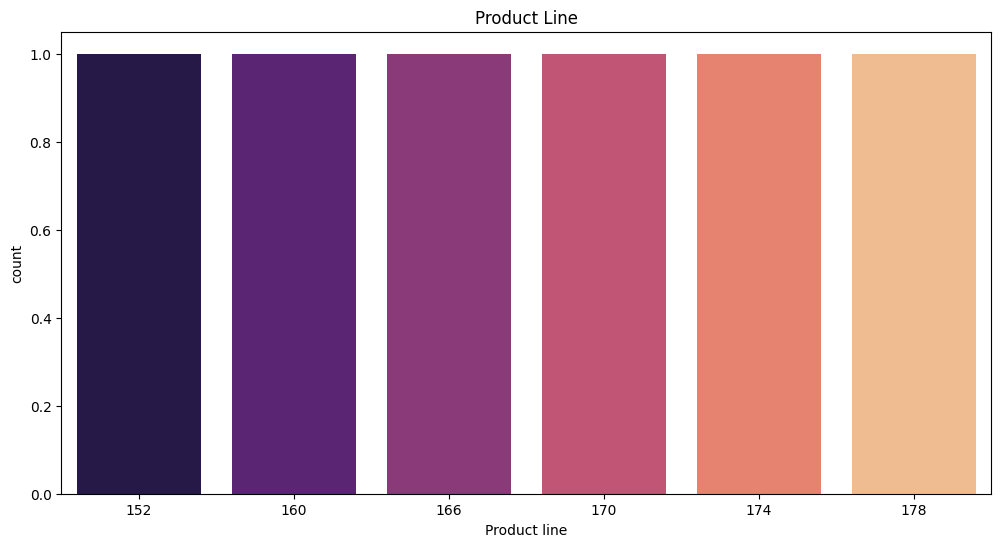

In [ ]:
plot_col('Product line')


values of column are Gender 
 Female    501
Male      499
Name: Gender, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


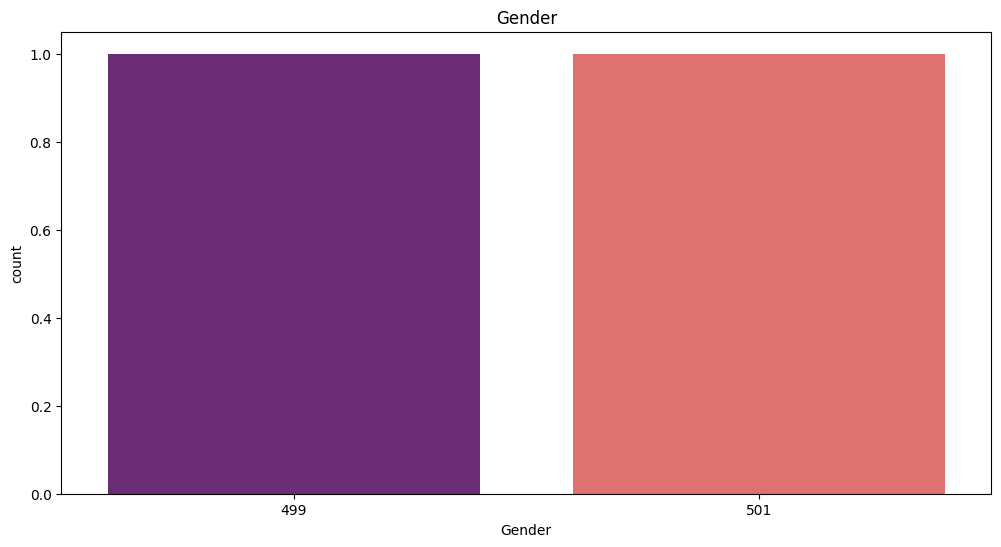

In [ ]:
plot_col('Gender')


values of column are Customer type 
 Member    501
Normal    499
Name: Customer type, dtype: int64


<ipython-input-286-68c6658971ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")


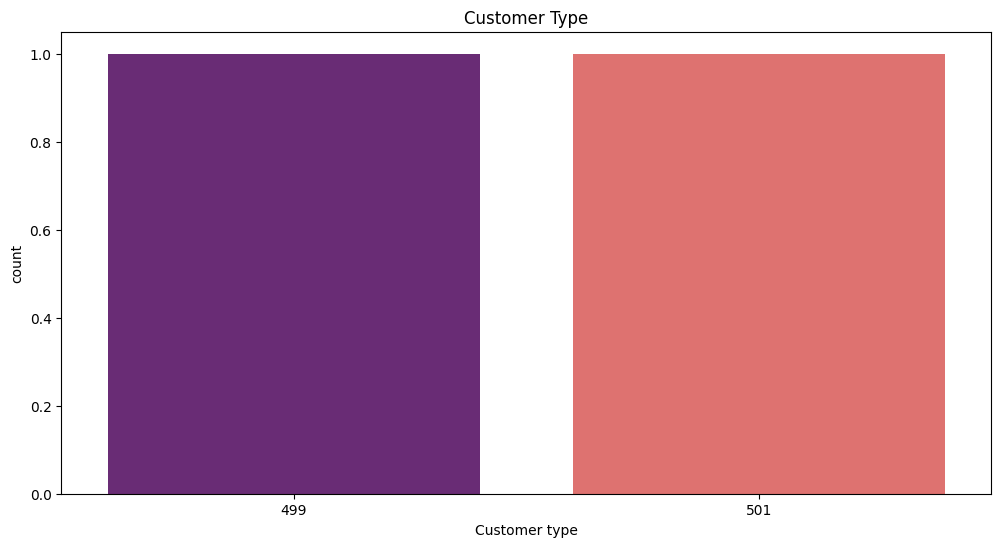

In [ ]:
plot_col('Customer type')


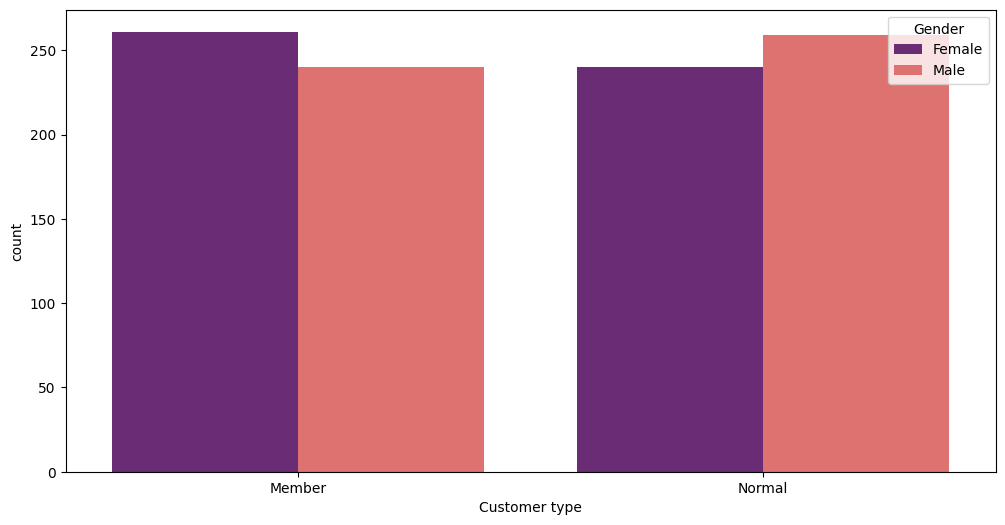

In [ ]:
plt.figure(figsize=(12 , 6))
sns.countplot(x = 'Customer type', data = data, hue = 'Gender', palette = "magma")
plt.show()

##pie plot


A pie plot is a proportional representation of the numerical data in a column


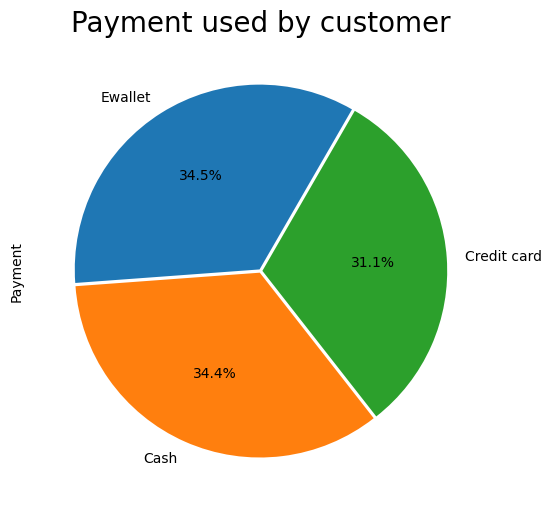

In [ ]:
plt.figure(figsize=(12,6))
data['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

##Barplot
A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

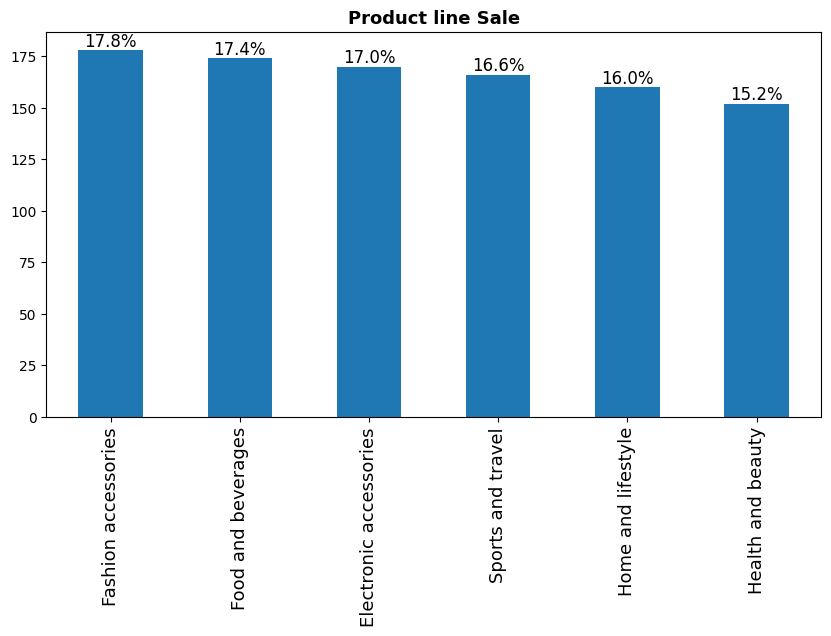

In [ ]:
plt.figure(figsize=(10, 5))
ax = data['Product line'].value_counts().plot.bar()
ax.set_title("Product line Sale", fontsize=13, fontweight='bold')
plt.xticks(fontsize=13)

total = len(data['Product line'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

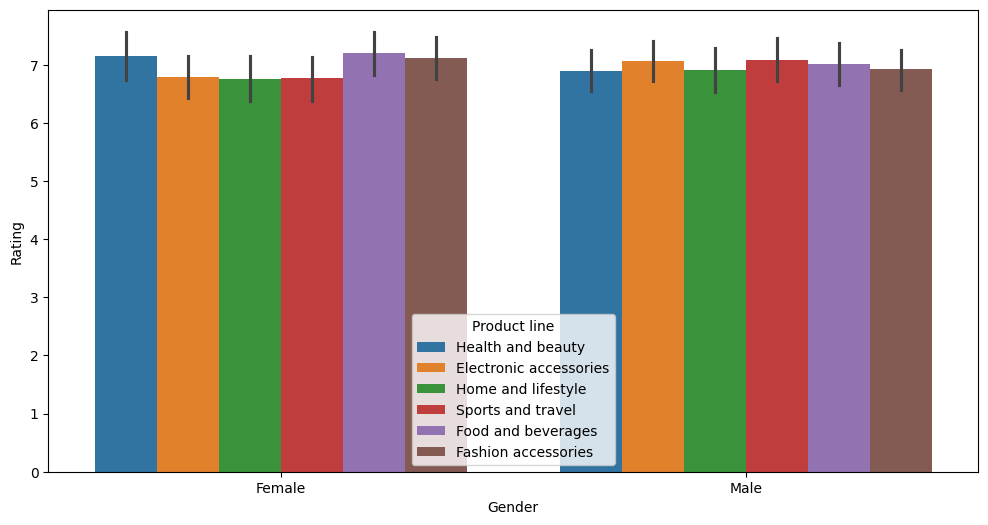

In [ ]:
plt.figure(figsize=(12 , 6))
sns.barplot(x='Gender' ,y = 'Rating' , hue='Product line', data= data )
plt.show()

<ipython-input-301-466d1d73474b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Rating'  , y="Unit price", data=data[50:70], palette='Set2')


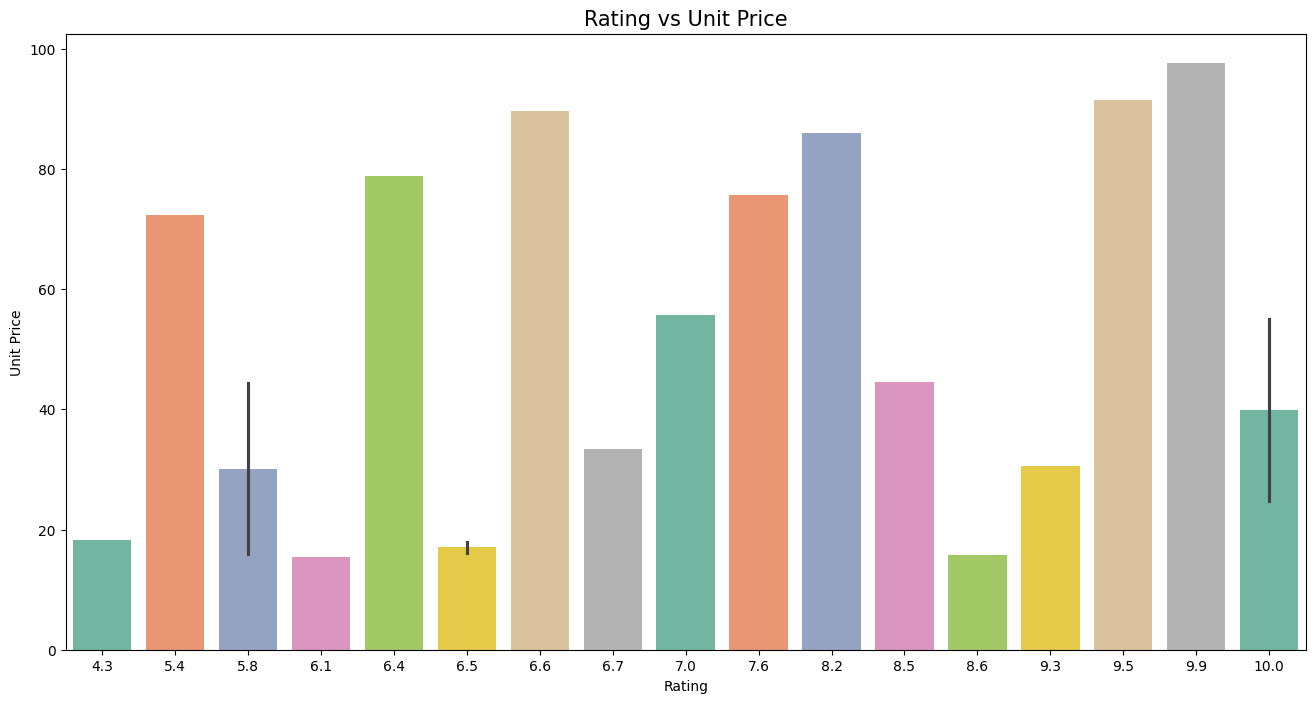

In [ ]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x = 'Rating'  , y="Unit price", data=data[50:70], palette='Set2')
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

<ipython-input-302-6bc66b77c59f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Gender", data=data[50:80], palette='Set1')


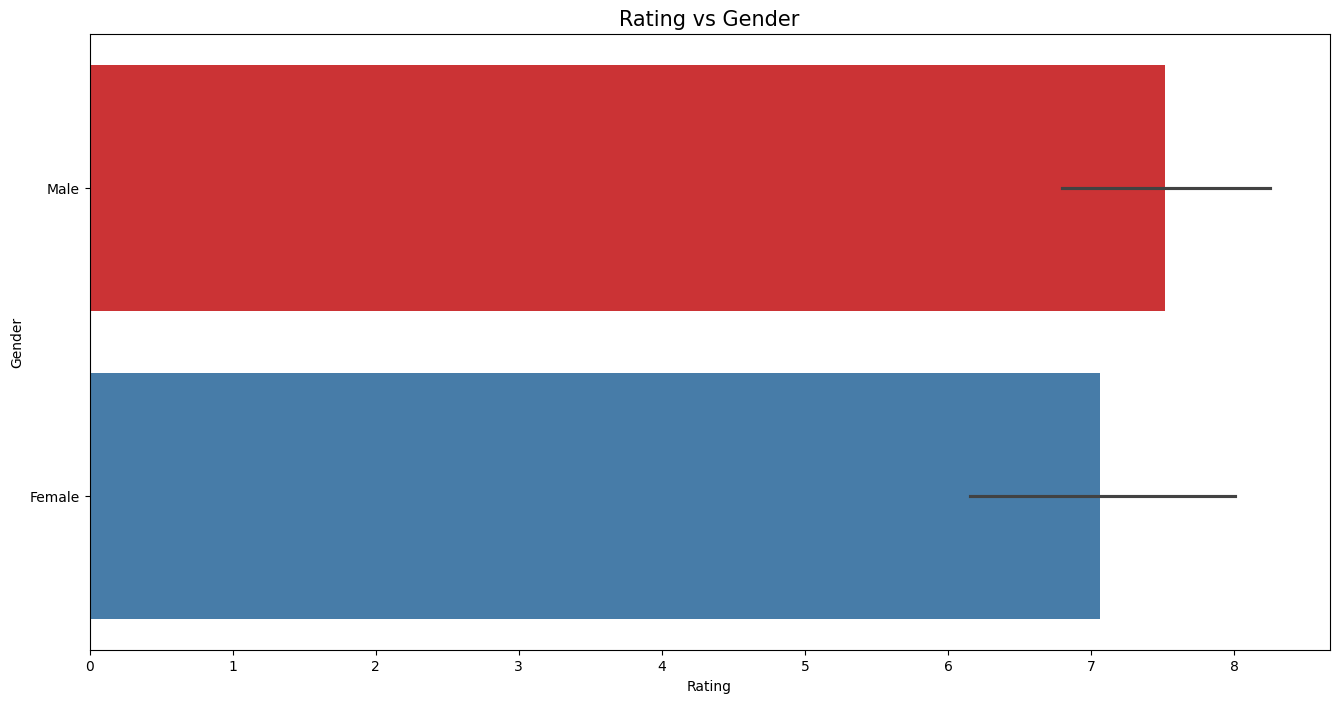

In [ ]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x="Rating", y="Gender", data=data[50:80], palette='Set1')
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

<ipython-input-303-e280f6faa53f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Quantity", data=data[50:80], palette='Set2')


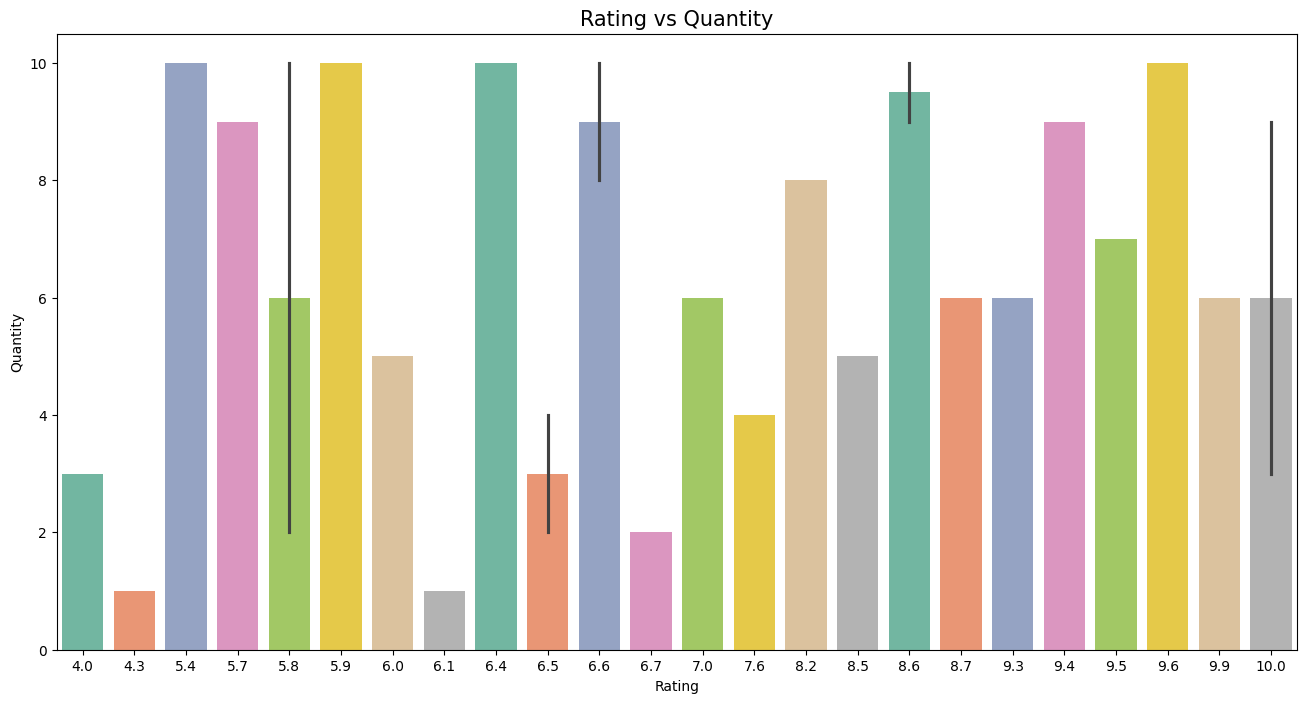

In [ ]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x="Rating", y="Quantity", data=data[50:80], palette='Set2')
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

##HEATMAP
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.


<ipython-input-304-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

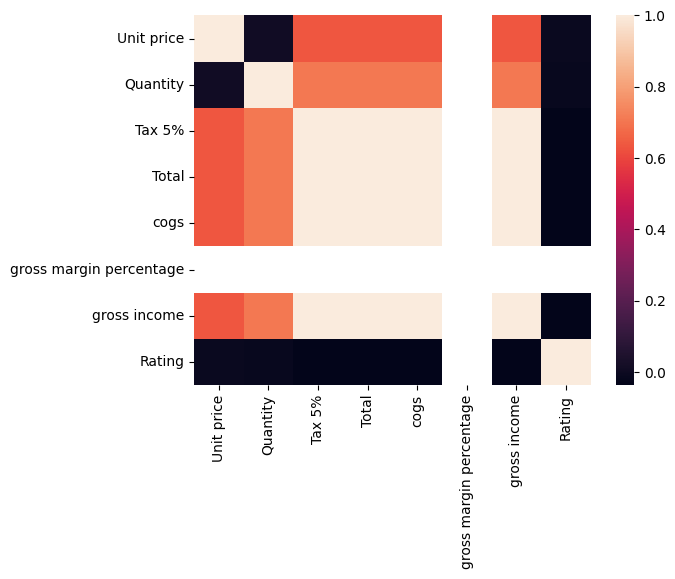

In [ ]:
sns.heatmap(data.corr())

<ipython-input-305-fc13829becff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(data.corr() , 1) , annot=True,fmt='.1f', linewidths=0.8 )


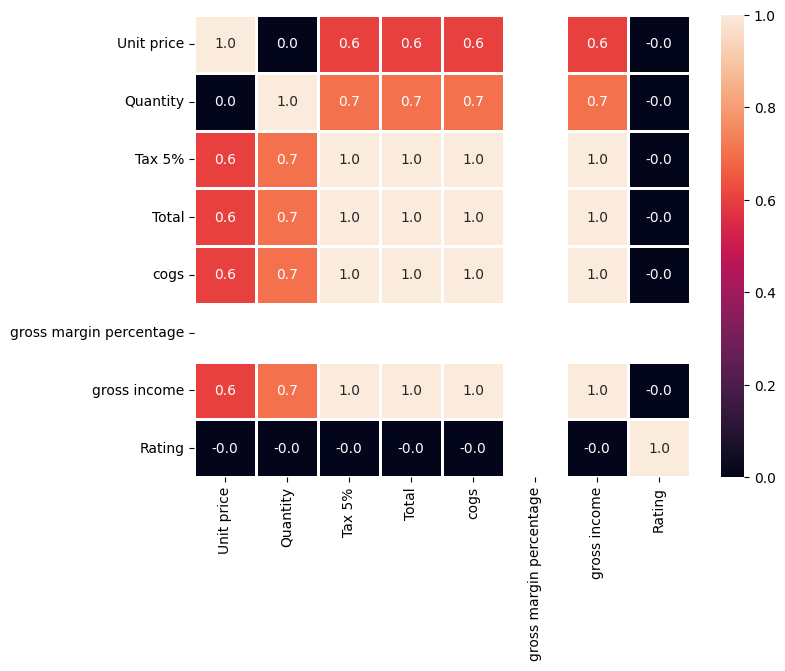

In [ ]:
plt.figure(figsize=(8 , 6))
sns.heatmap(round(data.corr() , 1) , annot=True,fmt='.1f', linewidths=0.8 )
plt.show()

##SCATTER PLOT

A scatter plot (scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.


In [ ]:
data.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
602,373-09-4567,C,Naypyitaw,Normal,Male,Food and beverages,77.56,10,38.78,814.38,3/14/2019,20:35,Ewallet,775.6,4.761905,38.78,6.9


<Axes: xlabel='Total', ylabel='Rating'>

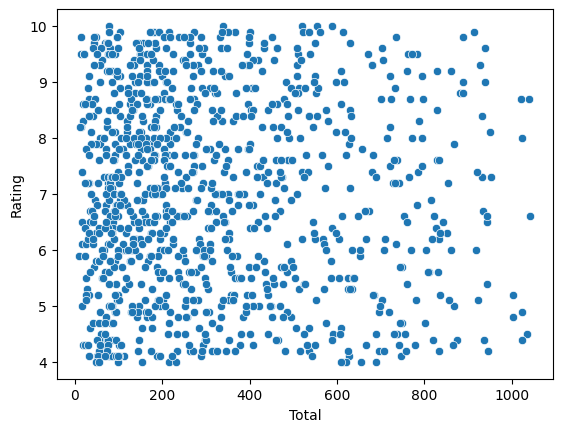

In [ ]:
sns.scatterplot(data = data , x = 'Total', y = 'Rating')

<Axes: xlabel='Total', ylabel='Tax 5%'>

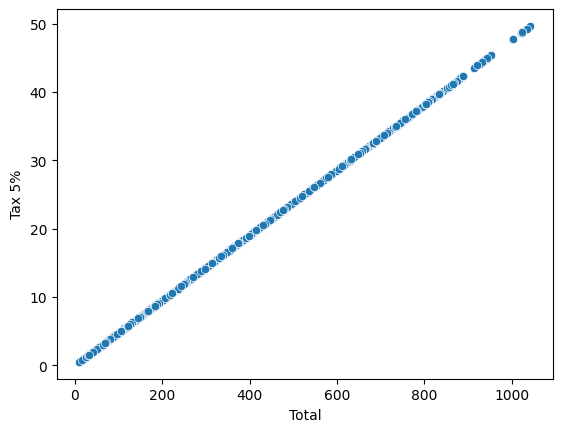

In [ ]:
sns.scatterplot(data = data , x = 'Total', y = 'Tax 5%')

##BOXPLOT

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<Axes: >

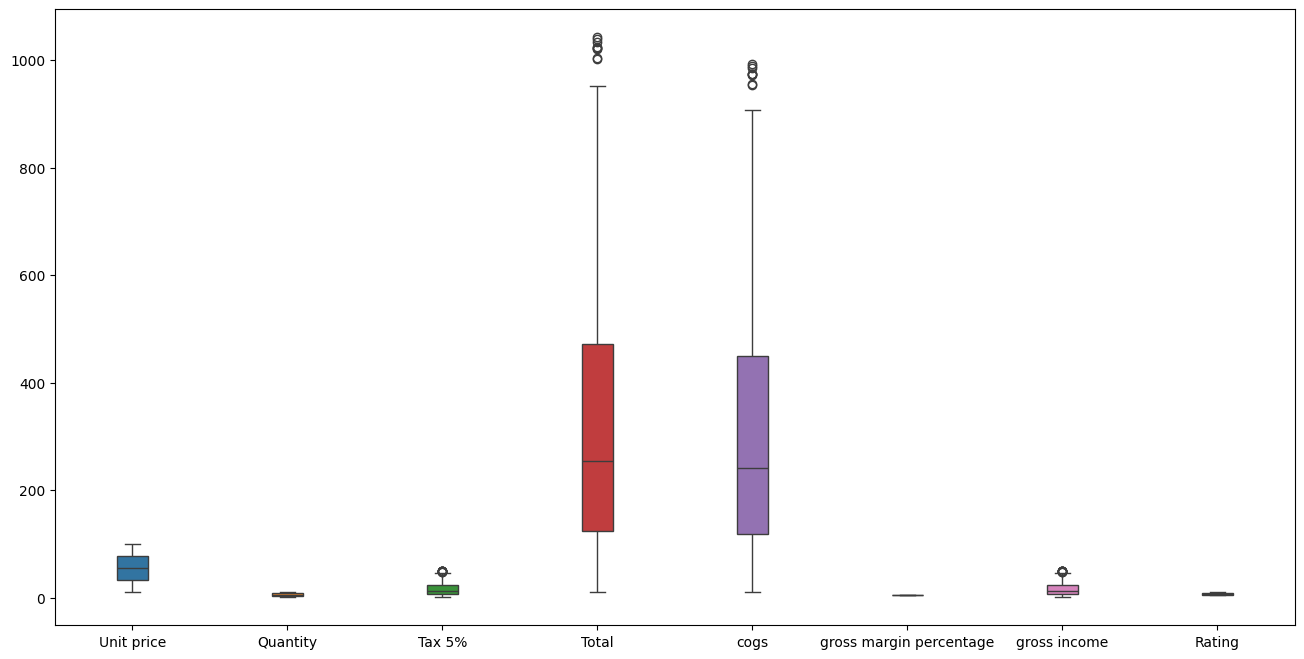

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data = data, width = 0.2)

<Axes: xlabel='cogs'>

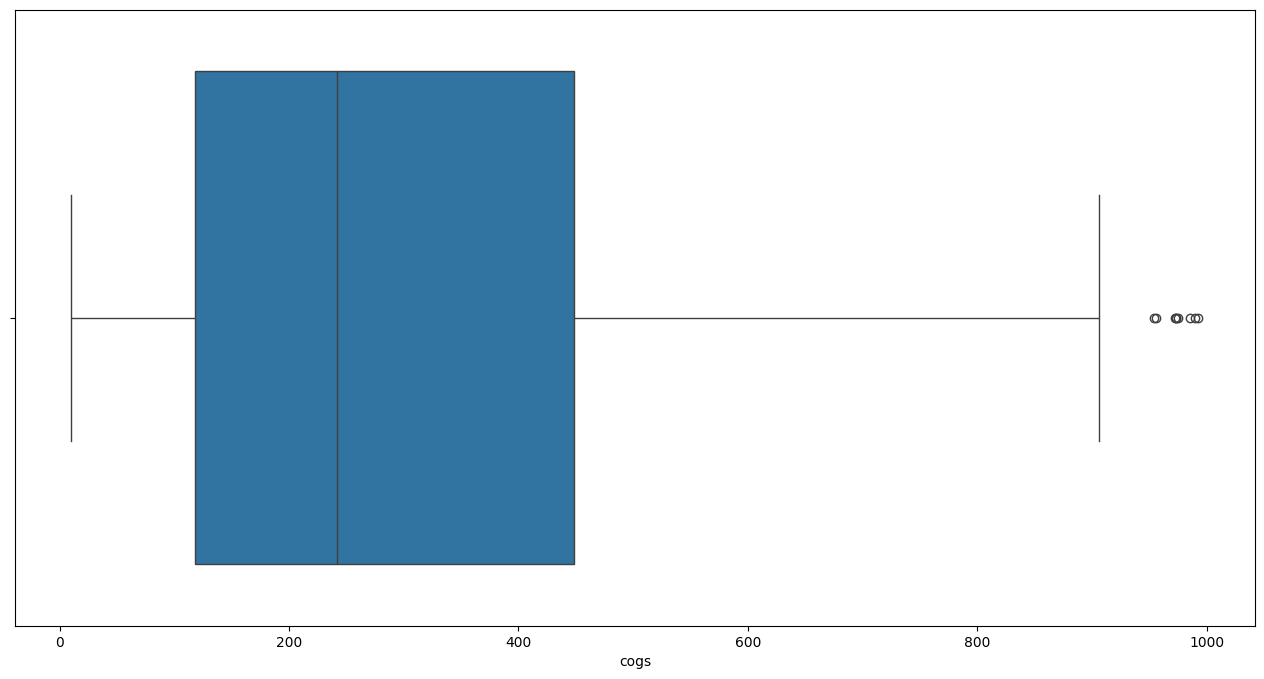

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data = data, x = 'cogs')

##HISTOGRAM

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.


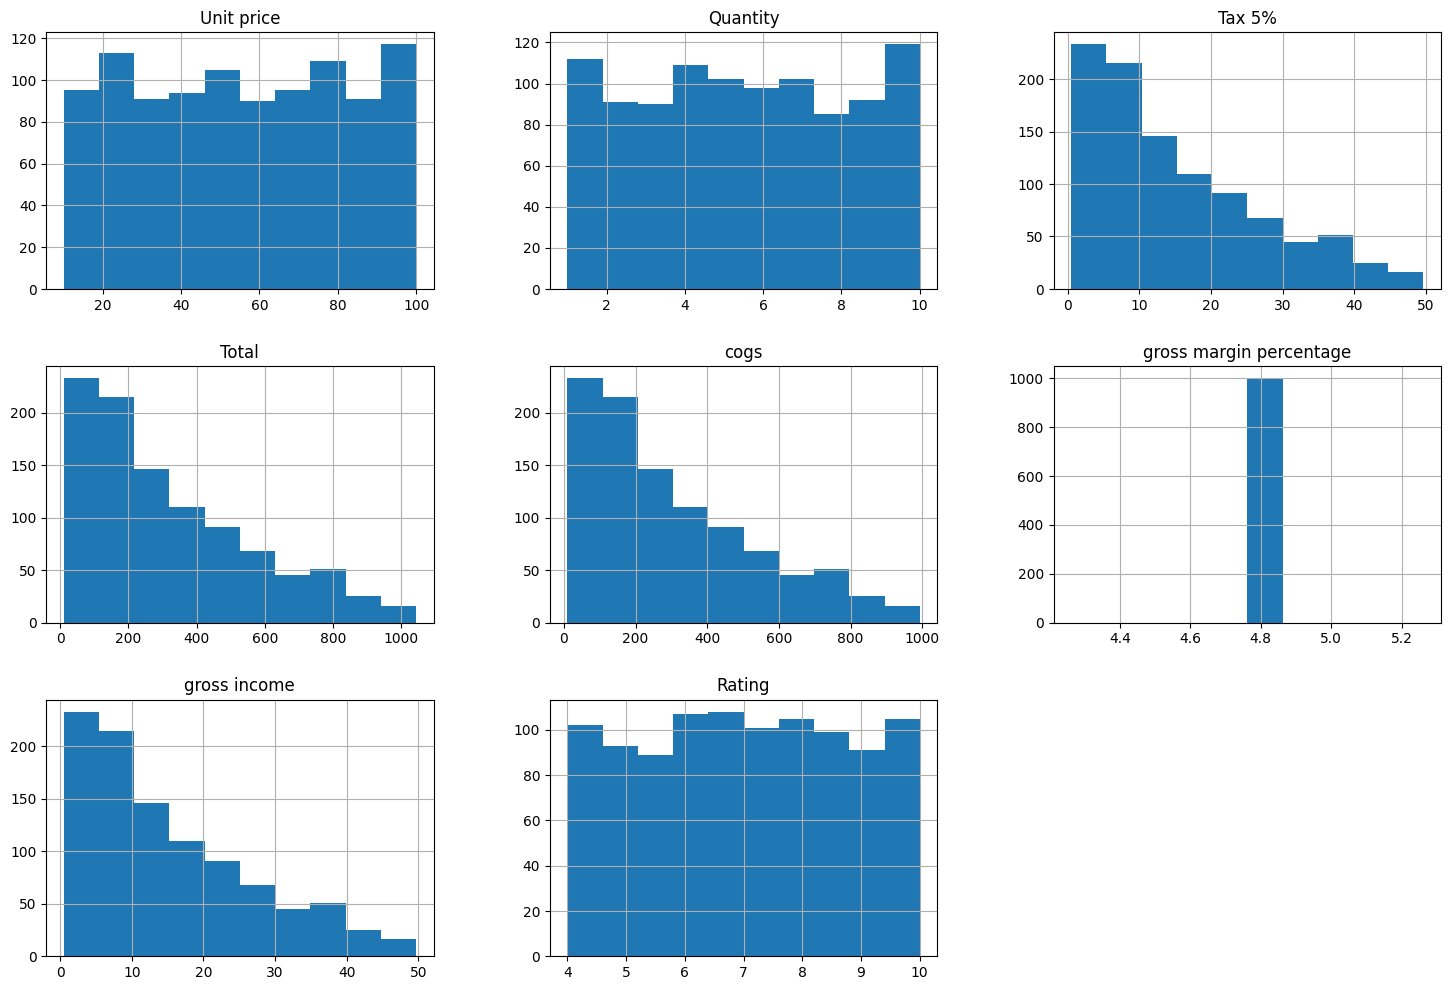

In [ ]:
data.hist(figsize=(18,12))
plt.show()

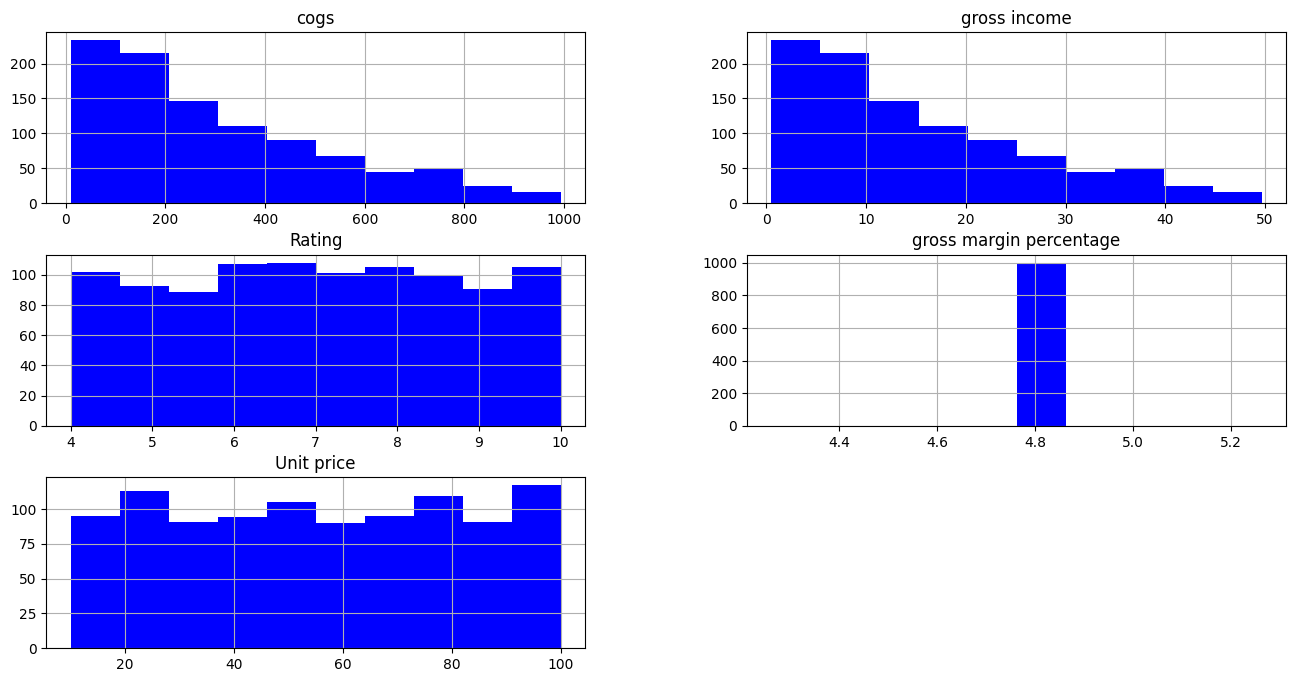

In [ ]:
data[['cogs' , 'gross income' ,'Rating' , 'gross margin percentage' , 'Unit price' ]].hist(bins = 10 ,color = 'blue' , figsize=(16,8))
plt.show()

##Regression Plot
to show if i can use Linear Regression Model with the data and it will fit or not ?

<Axes: xlabel='Total', ylabel='Rating'>

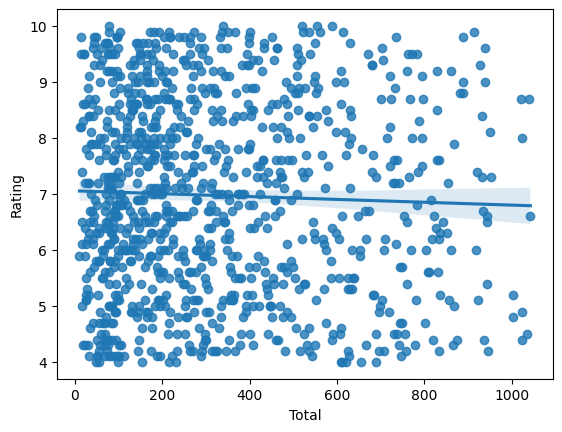

In [ ]:
sns.regplot(data= data , x = 'Total', y= 'Rating') #from the bar i can not use linear regression model because the line will not fit the data between Rating and total.

<Axes: xlabel='Total', ylabel='cogs'>

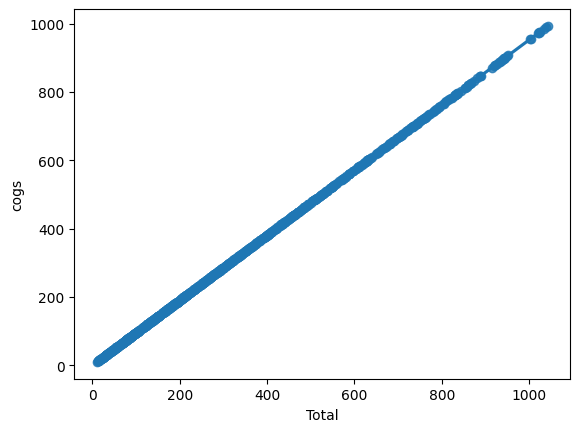

In [ ]:
sns.regplot(data= data , x = 'Total', y= 'cogs') #from the bar i can use here linear regression model because the line will 100% fit the data between the cogs and total.

##PAIRPLOT

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.


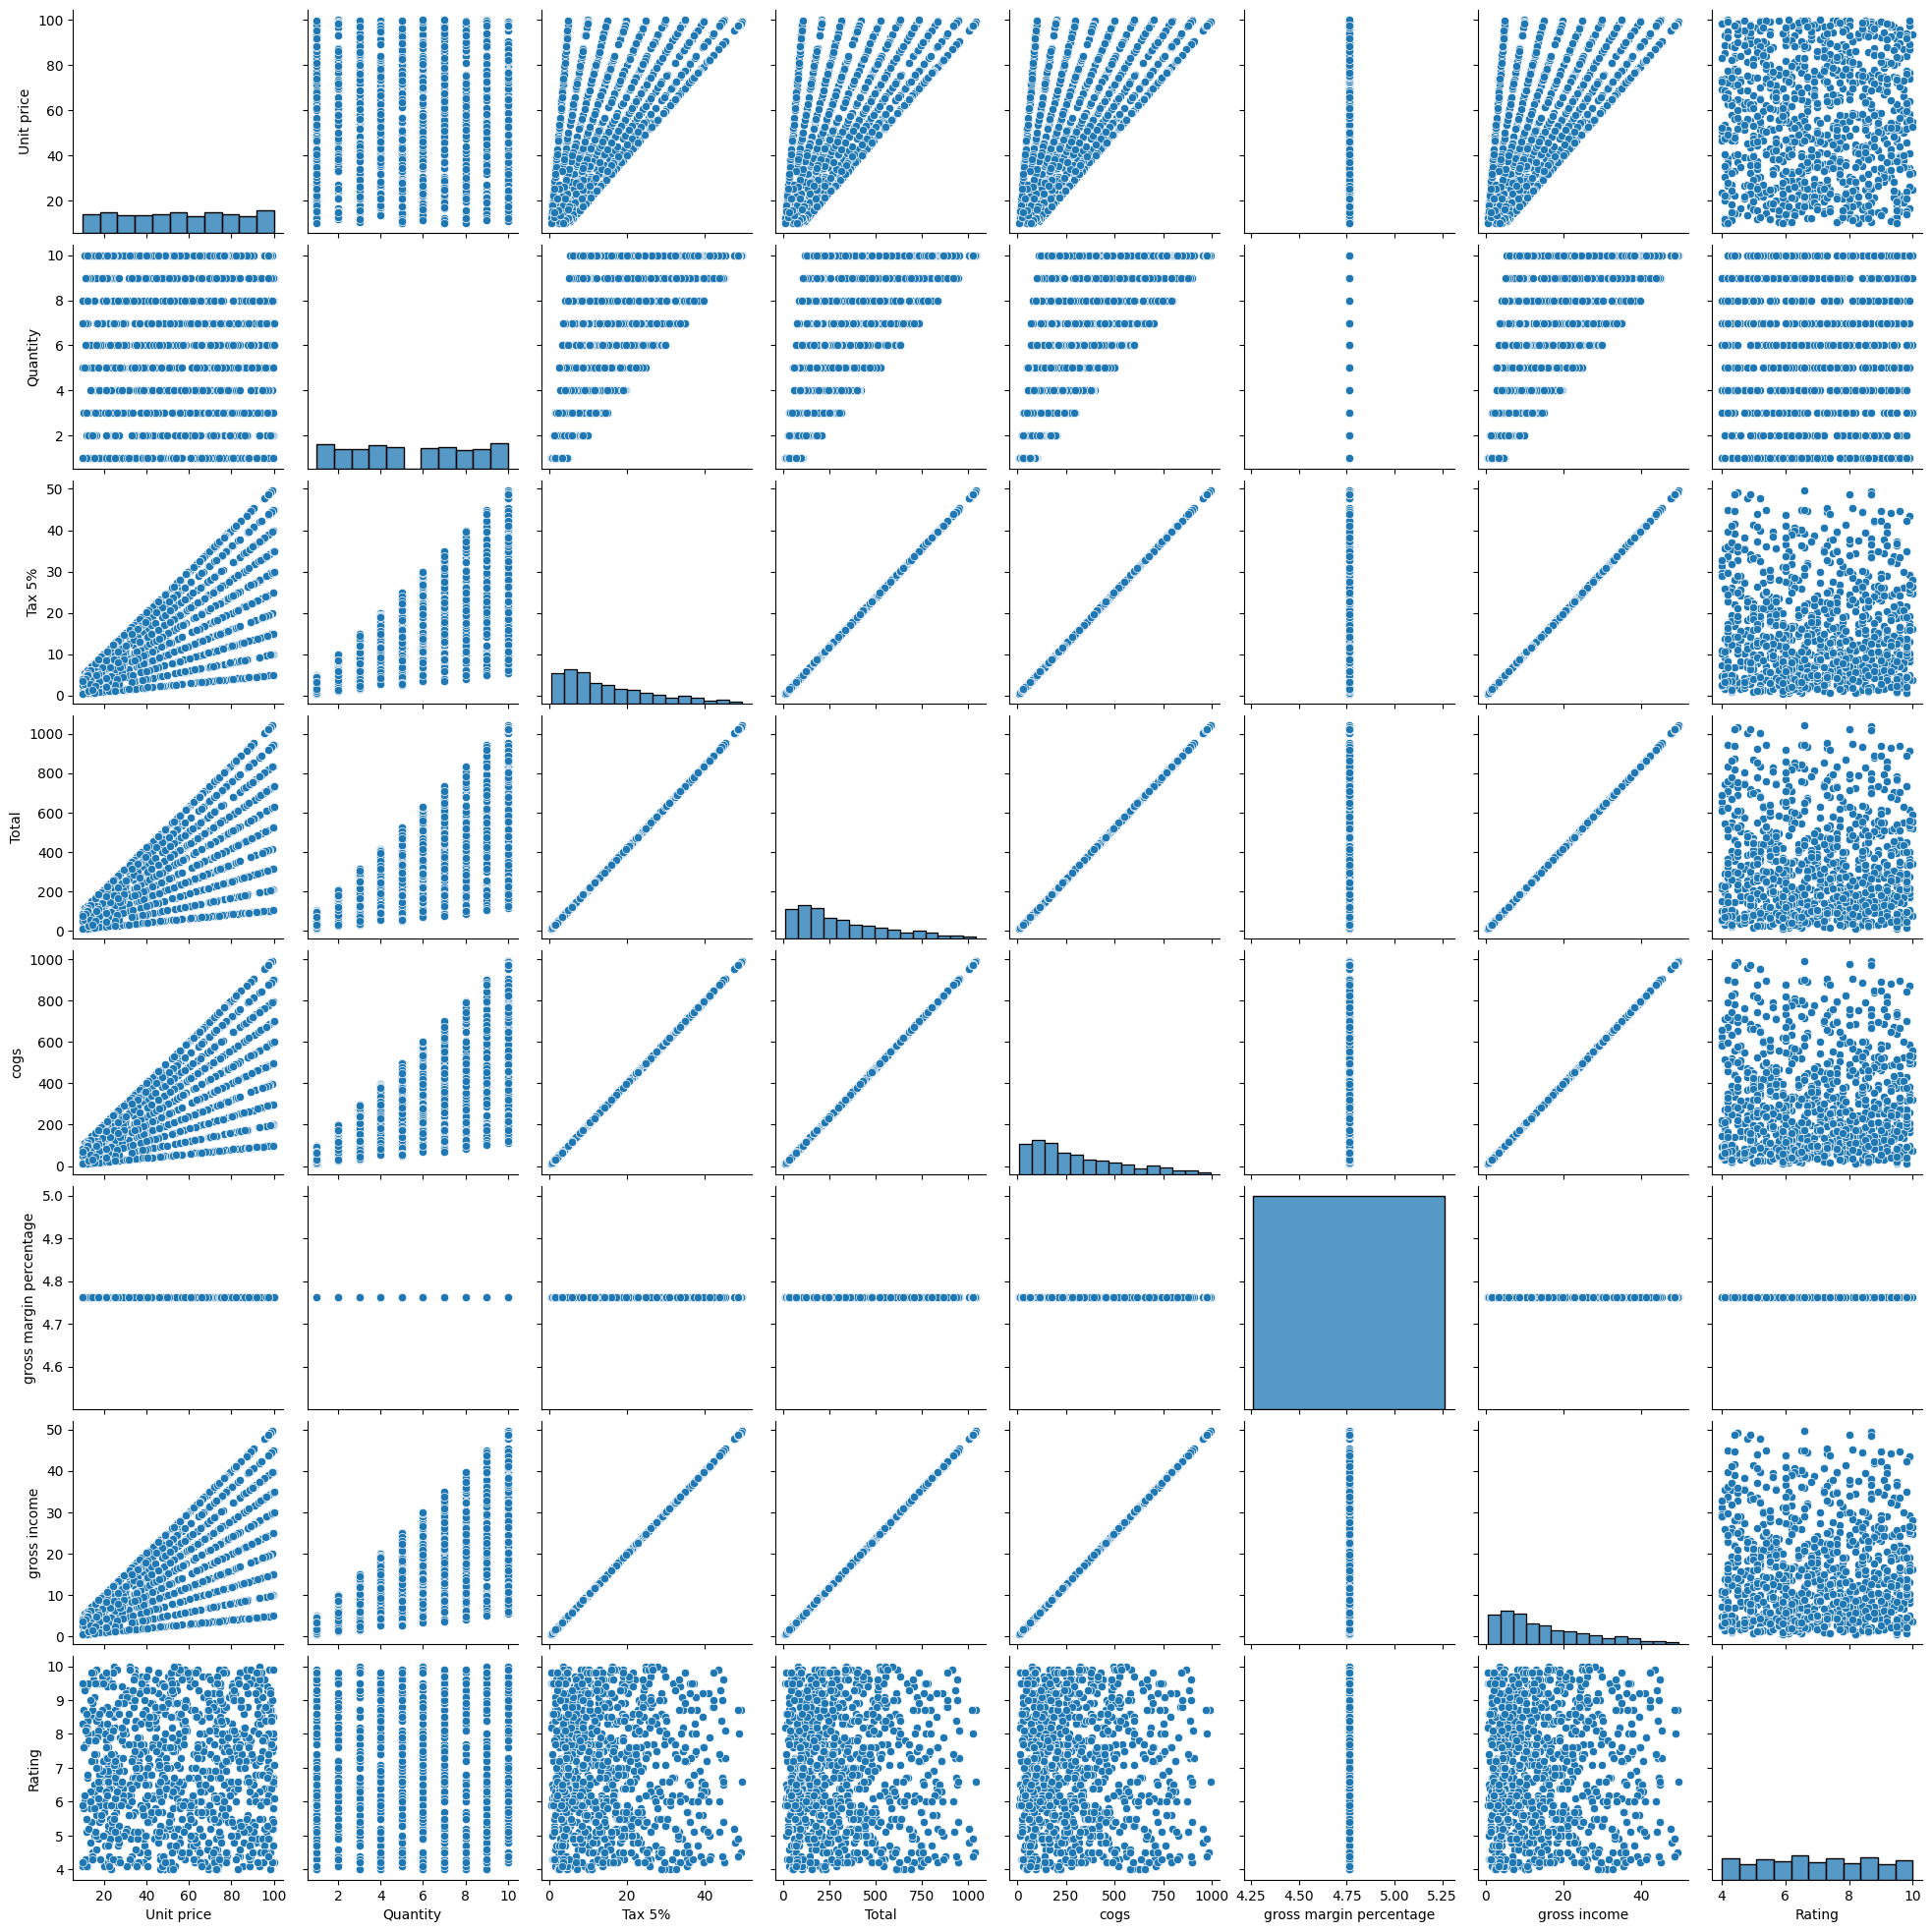

In [ ]:
sns.pairplot(data = data)


##Jointplot


A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X)


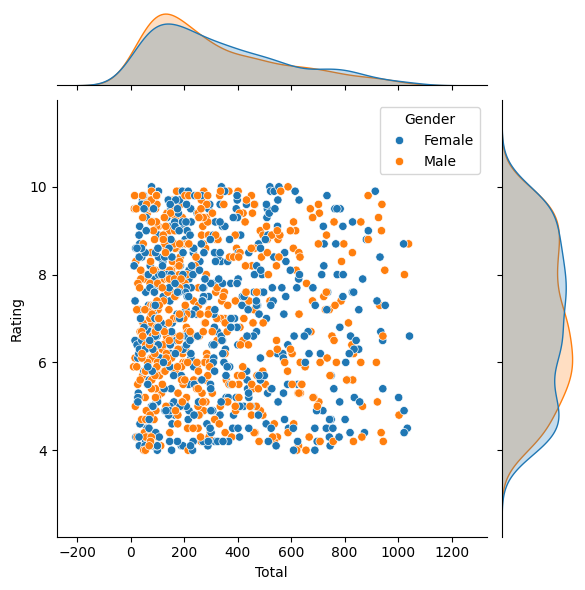

In [ ]:
sns.jointplot(x='Total',y='Rating',hue='Gender',data=data)


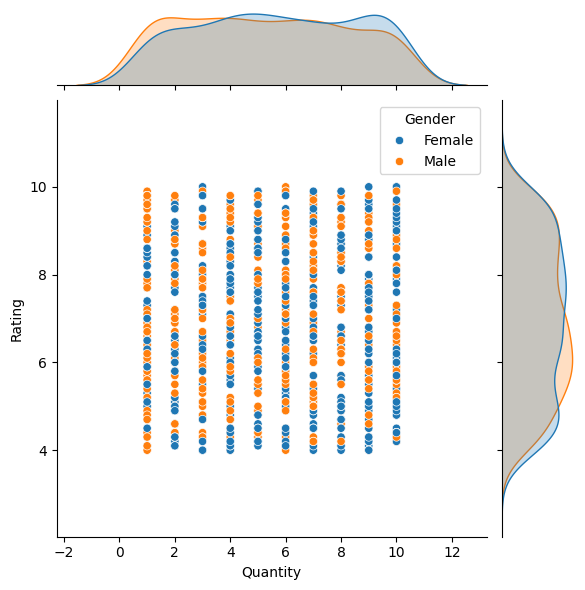

In [ ]:
sns.jointplot(x='Quantity',y='Rating',hue='Gender',data=data)


#Data PreProcessing

In [ ]:
from sklearn.preprocessing import LabelEncoder               # to convert data objects to numeric
lab = LabelEncoder()                                         # we can here use pd.get_dummies()

In [ ]:
obj = data.select_dtypes(include = 'object')             # select the object columns and the numeric columns in the data
non_obj = data.select_dtypes (exclude = 'object')

In [ ]:
for i in range (0,obj.shape[1]):                                  # covert data object to numeric
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])


<ipython-input-320-39f6f4187841>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])
<ipython-input-320-39f6f4187841>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])
<ipython-input-320-39f6f4187841>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df

In [ ]:
df = pd.concat([obj,non_obj], axis = 1)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,26,146,2,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,87,23,0,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,81,155,1,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,19,485,2,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,57,29,2,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


## Train Test Split

In [ ]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


# Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y.values.reshape(-1, 1))



In [ ]:
x

array([[0.81481481, 0.        , 1.        , ..., 0.        , 0.52161615,
        0.85      ],
       [0.14214214, 1.        , 0.5       , ..., 0.        , 0.06738704,
        0.93333333],
       [0.65365365, 0.        , 1.        , ..., 0.        , 0.31962801,
        0.56666667],
       ...,
       [0.76776777, 0.        , 1.        , ..., 0.        , 0.02204857,
        0.61666667],
       [0.30830831, 0.        , 1.        , ..., 0.        , 0.0566222 ,
        0.01666667],
       [0.93593594, 0.        , 1.        , ..., 0.        , 0.6188354 ,
        0.43333333]])

In [ ]:
y

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

# ML MODELS (Algorithms)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##KNeighborsClassifier
By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.


In [ ]:
def all(model):
  model.fit(x_train , y_train)
  pre = model.predict(x_test)


In [ ]:
model1 = KNeighborsClassifier()
all(model1)

In [ ]:
y_pred_knn= model1.predict(x_test)


In [ ]:
y_pred_knn

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))
print("Training Score:\n",model1.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.48      0.47       100
           1       0.46      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200

Confusion Matrix:
 [[48 52]
 [55 45]]
Training Score:
 66.5


## SVC

In [ ]:
model2 = SVC()
model2.fit(x_train ,y_train)

SVC()

In [ ]:
y_pred_svc = model2.predict(x_test)


In [ ]:
y_pred_svc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))
print("Training Score:\n",model2.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.50000000000001


##Random Forest Classifier


A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
model3 = RandomForestClassifier()
all(model3)

In [ ]:
y_pred_rfc = model3.predict(x_test)


In [ ]:
y_pred_rfc


array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_rfc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rfc))
print("Training Score:\n",model3.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

Confusion Matrix:
 [[50 50]
 [60 40]]
Training Score:
 100.0


##AdaBoostClassifier


An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases

In [ ]:
model4 = AdaBoostClassifier()
all(model4)


In [ ]:
y_pred_adb = model4.predict(x_test)

In [ ]:
y_pred_adb


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_adb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_adb))
print("Training Score:\n",model4.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       100
           1       0.54      0.54      0.54       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion Matrix:
 [[54 46]
 [46 54]]
Training Score:
 67.0


##Gradient Boosting Classifier


In [ ]:
model5 = GradientBoostingClassifier()
all(model5)

In [ ]:
y_pred_gbc = model5.predict(x_test)


In [ ]:
y_pred_gbc

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",model5.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 88.0


## DecisionTreeClassifier


In [ ]:
model6 =DecisionTreeClassifier()
all(model6)


In [ ]:
y_pred_dtc = model6.predict(x_test)


In [ ]:
y_pred_dtc

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",model6.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 100.0


##GaussianNB


In [ ]:
model7= GaussianNB()
all(model7)

In [ ]:
y_pred_gnb = model7.predict(x_test)


In [ ]:
y_pred_gnb

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",model7.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 55.125


##ExtraTreesClassifier

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.


In [ ]:
model8= ExtraTreesClassifier()
all(model8)

In [ ]:
y_pred_etc = model8.predict(x_test)


In [ ]:
y_pred_etc

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0])

In [ ]:
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",model8.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       100
           1       0.48      0.47      0.48       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[50 50]
 [53 47]]
Training Score:
 100.0


## The Difference between the Models

In [ ]:
df_Predicted = pd.DataFrame({'Actual' : y_test , 'SVC Predicted' : y_pred_svc ,
                  'Gradient Boosting Classifier Predicted' : y_pred_gbc , 'KNeighborsClassifier Predicted' : y_pred_knn ,
                   'Random Forest Classifier Predicted' : y_pred_rfc , ' AdaBoostClassifier Predicted' :y_pred_adb ,
                   'ExtraTreesClassifier Predicted' : y_pred_etc , 'GaussianNB Predicted' :y_pred_gnb,'DecisionTreeClassifier Predicted' :y_pred_dtc } )

In [ ]:
df_Predicted.set_index('Actual')


,SVC Predicted,Gradient Boosting Classifier Predicted,KNeighborsClassifier Predicted,Random Forest Classifier Predicted,AdaBoostClassifier Predicted,ExtraTreesClassifier Predicted,GaussianNB Predicted,DecisionTreeClassifier Predicted
Actual,,,,,,,,
1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,1,0,0
1,0,1,0,1,1,1,1,0
1,0,0,1,0,1,0,1,0
0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
1,0,0,0,0,0,1,1,0
1,1,1,1,1,1,1,1,0
1,1,1,1,0,0,0,1,0


#CONCLUSION :


##ACCURACIES OF DIFFERENT MODELS ARE:

* KNeighbors Classifier= 66.50 %

* SVC= 55.50 %

* Random Forest Classifier= 100 %

* Ada Boost Classifier= 67 %

* Gradient Boosting Classifier= 88 %

* DecisionTreeClassifier=100 %

* GaussianNB=55%

* Extra Trees Classifier= 100 %

We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.

